# Some useful background knowledge 
                                   when dealing with Noise

Sources: 
- @ http://www.gracey.co.uk/basics/statistics-b1.htm
- @ https://www.cirrusresearch.co.uk/blog/2015/06/noise-101-what-is-equivalent-continuous-sound-level-leq/

#### Introduction

- Noise levels often fluctuate over a wide range and over time; modern sound sensors sample (and store) more than ten times a second
- As such, a single value descriptor is a helpful statistic
- Any statistical value between 0.01% and 99.99% may be calculated, but the widely used ones are the L10 and the L90 or L95.

**Leq (Equivalent Continuous Sound Level)**:

- Technically refers to the average sound pressure level during a period of time
- Often described as the average noise level during a noise measurement, which although not technically correct, is often the easiest way to think of Leq
- Why is Leq useful? If the noise is varying quickly, the average energy over a period of time is a very useful measurement parameter

**Example of L50 (the noise level exceeded for 50% of the measurement duration):**

If we sample noise levels and store the results once a second, then at the end of an hour we would have 3600 samples. If add up all the samples and divide by 3600 then we will get the average or L50% value of the noise over the hour.

**Ambient Noise (L90 or L95)**:

"Ambient Noise Level is the background sound pressure level at a given location, normally specified as a reference level to study a new intrusive sound source" - _Wikipedia_

The L90 or the L95 have been widely adopted to quantify background noise levels.

L90 describes the level which was exceeded for 90% of the time. That is, for 90% of the time for the period measured, the noise level was at least above the L90 level. 

# Purpose of this notebook

1) To calculate ambient noise level for each sensor in a particular time period of interest

2) See how it can help identify periods of interest where there are huge pikes beyond ambient noise level 

Note: only on QY's narrowed down sensors. Will include Sid's sensors in the next iteration

### Proposed Methodology

1) Case study for that day when jackhammering was observed i.e 12th April 2017 between 8am and 9am
- For each sensor, resample to appropriate time frame  
- Then use formula to calculate ambient noise level for that resampled portion
- Observe if there is anything of interest for sensor data for that day of construction

2) Resample to a larger scale of time to identify on a broader basis, periods that might be of interest

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading the sensors data (from earlier work done in qy_sensors2.ipynb)

In [4]:
# adding all pickled files name to a list
pickled_files = ['sonycnode-b827eb820cfe.sonyc.p',
 'sonycnode-b827eb8e2420.sonyc.p',
 'sonycnode-b827eb73e772.sonyc.p',
 'sonycnode-b827eb815321.sonyc.p',
 'sonycnode-b827eb329ab8.sonyc.p',
 'sonycnode-b827ebdd5c38.sonyc.p',
 'sonycnode-b827eb0d8af7.sonyc.p',
 'sonycnode-b827eb4e7821.sonyc.p',
 'sonycnode-b827eb86d458.sonyc.p']


# creating a list of all the filenames without the ".p" extension
filenames=[]
for i in range(9): 
    filenames.append(pickled_files[i][:22]) #removing the file extension 

In [3]:
filenames

['sonycnode-b827eb820cfe',
 'sonycnode-b827eb8e2420',
 'sonycnode-b827eb73e772',
 'sonycnode-b827eb815321',
 'sonycnode-b827eb329ab8',
 'sonycnode-b827ebdd5c38',
 'sonycnode-b827eb0d8af7',
 'sonycnode-b827eb4e7821',
 'sonycnode-b827eb86d458']

In [5]:
#Reading the pickled files
dict_files = {}
for i in range(9):
    # print(filenames[i])
    dict_files[filenames[i]]= pd.read_pickle(pickled_files[i])

In [6]:
#To store for each filename, its corresponding dataset
for i in range(9):
    filenames[i] = dict_files[filenames[i]]

In [8]:
filenames[0].head()

,timestamp,dBAS
timestamp,,
2016-12-10 14:43:46.990000010-05:00,2016-12-10 19:43:46.990000010,61.939999
2016-12-10 14:43:47.990000010-05:00,2016-12-10 19:43:47.990000010,63.380001
2016-12-10 14:43:48.990000010-05:00,2016-12-10 19:43:48.990000010,63.549999
2016-12-10 14:43:49.990000010-05:00,2016-12-10 19:43:49.990000010,62.599998
2016-12-10 14:43:51-05:00,2016-12-10 19:43:51.000000000,63.270000


Narrowing down to year 2017

In [9]:
year_2017 = ['sonycnode-b827eb820cfe',
 'sonycnode-b827eb8e2420',
 'sonycnode-b827eb73e772',
 'sonycnode-b827eb815321',
 'sonycnode-b827eb329ab8',
 'sonycnode-b827ebdd5c38',
 'sonycnode-b827eb0d8af7',
 'sonycnode-b827eb4e7821',
 'sonycnode-b827eb86d458']

dict_2017 = {}

#narrowing down to year of interest
for i in range(9):
    # print(filenames[i])
    dict_2017[year_2017[i]]= filenames[i][filenames[i]['timestamp'].dt.year == 2017]
    
for i in range(9):
    year_2017[i] = dict_2017[year_2017[i]]

Narrowing down to only date of interest

In [16]:
year_2017_4_12 = ['sonycnode-b827eb820cfe',
 'sonycnode-b827eb8e2420',
 'sonycnode-b827eb73e772',
 'sonycnode-b827eb815321',
 'sonycnode-b827eb329ab8',
 'sonycnode-b827ebdd5c38',
 'sonycnode-b827eb0d8af7',
 'sonycnode-b827eb4e7821',
 'sonycnode-b827eb86d458']

# Retrieving only the date of interest
dict_2017_4_12 = {}
for i in range(9):
    # print(filenames[i])
    dict_2017_4_12[year_2017_4_12[i]]= year_2017[i][(year_2017[i]['timestamp'].dt.month == 4)&(year_2017[i]['timestamp'].dt.day == 12)]
    
for i in range(9):
    year_2017_4_12[i] = dict_2017_4_12[year_2017_4_12[i]]

#### Resampling by the minute for the day of interest

In [26]:
year_2017_4_12_m = ['sonycnode-b827eb820cfe',
 'sonycnode-b827eb8e2420',
 'sonycnode-b827eb73e772',
 'sonycnode-b827eb815321',
 'sonycnode-b827eb329ab8',
 'sonycnode-b827ebdd5c38',
 'sonycnode-b827eb0d8af7',
 'sonycnode-b827eb4e7821',
 'sonycnode-b827eb86d458']

dict_2017_4_12_m = {}

# resampling to minutes for date of interest
for i in range(9):
    year_2017_4_12[i] = year_2017_4_12[i].reset_index(drop=True)
    dict_2017_4_12_m[year_2017_4_12_m[i]] = year_2017_4_12[i].resample('1min', on='timestamp').mean().reset_index()
    dict_2017_4_12_m[year_2017_4_12_m[i]]['time'] = [d.time() for d in dict_2017_4_12_m[year_2017_4_12_m[i]]['timestamp']]
    
for i in range(9):
    year_2017_4_12_m[i] = dict_2017_4_12_m[year_2017_4_12_m[i]]

In [23]:
year_2017_4_12_m[0].head()

,timestamp,dBAS,time
0,2017-04-12 00:00:00,70.644669,00:00:00
1,2017-04-12 00:01:00,67.750664,00:01:00
2,2017-04-12 00:02:00,66.588997,00:02:00
3,2017-04-12 00:03:00,68.678169,00:03:00
4,2017-04-12 00:04:00,67.439499,00:04:00


In [25]:
year_2017_4_12_m[0].shape

(1440, 3)

#### Calculating Ambient Noise Level

Calculate statistical noise level (Lx) - L90 = background level, L1 = peak level

In [27]:
# Code credit @ Charlie from helper notebooks

def calcbg(data, stat_value=90):
    stat_percentile = 100 - stat_value
    return np.nanpercentile(data, stat_percentile)

In [42]:
L90_m = []

for i in range(9):
    L90_m.append(calcbg(year_2017_4_12_m[i]['dBAS']))

L90_m

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1148: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


[63.981967544555665,
 53.94314956665039,
 60.84628257751464,
 54.723167419433594,
 nan,
 57.93783187866211,
 64.90335083007812,
 60.594200134277344,
 56.43456802368164]

it seems that there is no record for sensor 4 that day, shall assume it to be faulty for now

In [44]:
L90_m[0]

63.981967544555665

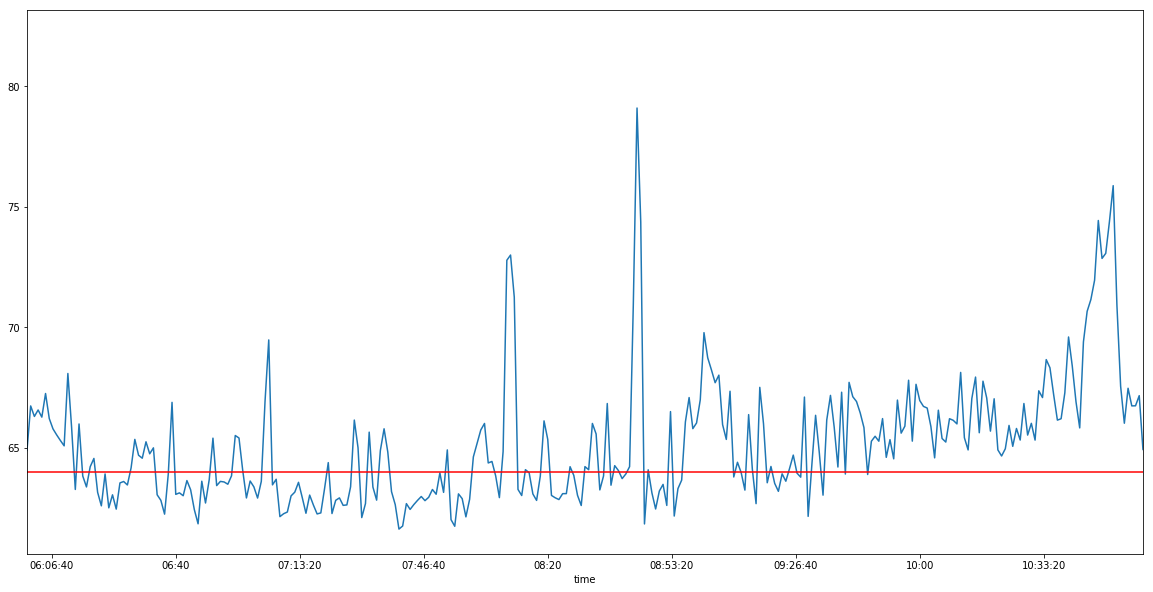

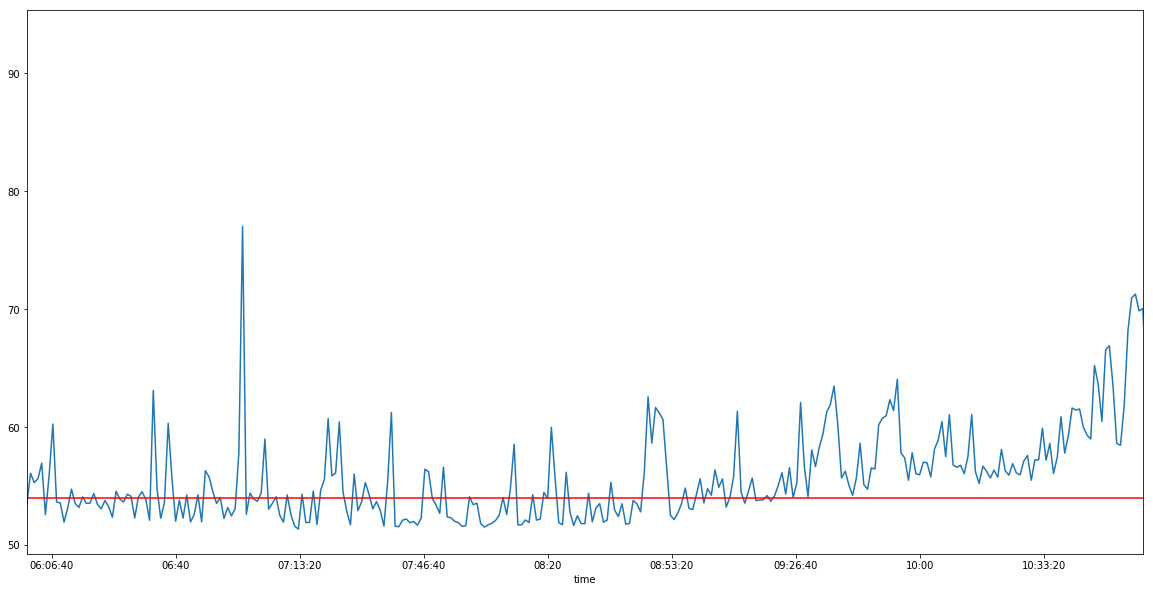

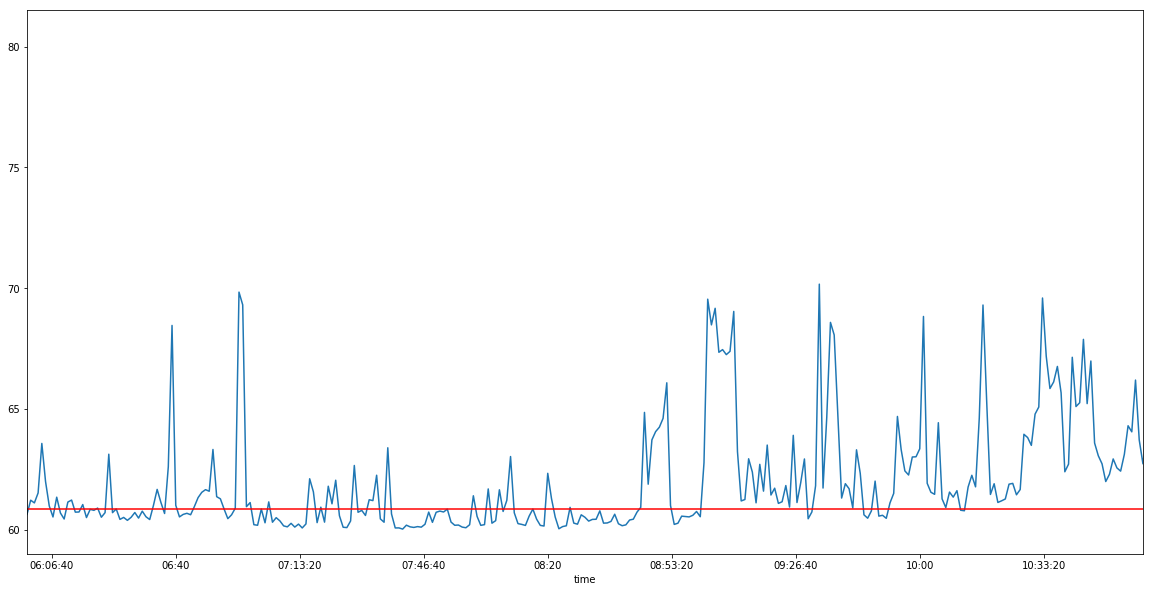

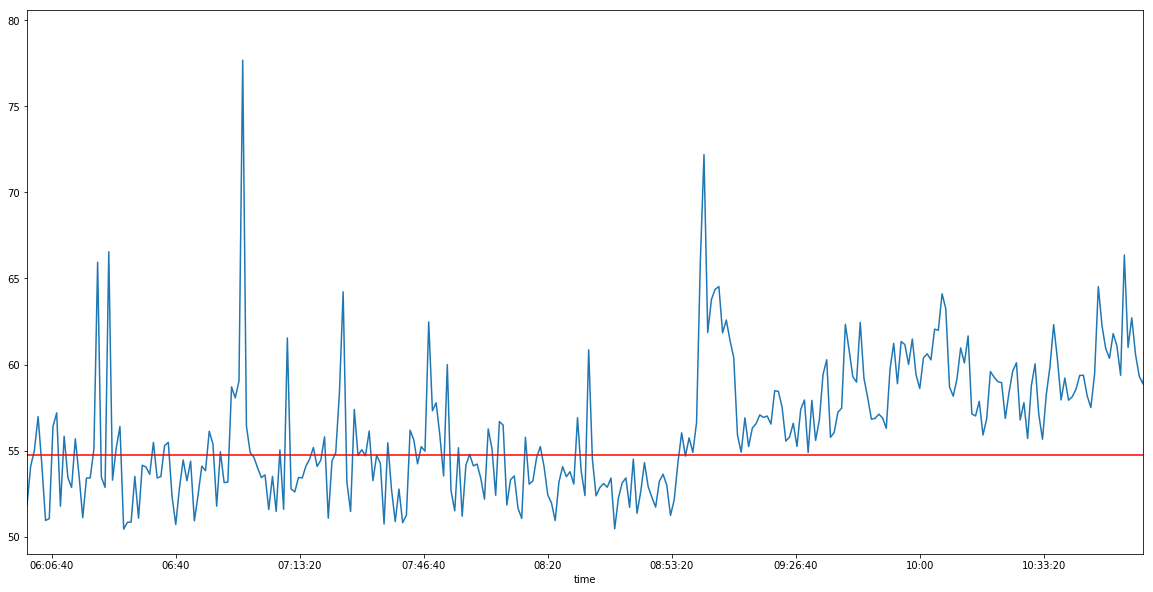

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:718: RuntimeWarning: invalid value encountered in less
  scaley = (yy < ymin) or (yy > ymax)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:718: RuntimeWarning: invalid value encountered in greater
  scaley = (yy < ymin) or (yy > ymax)


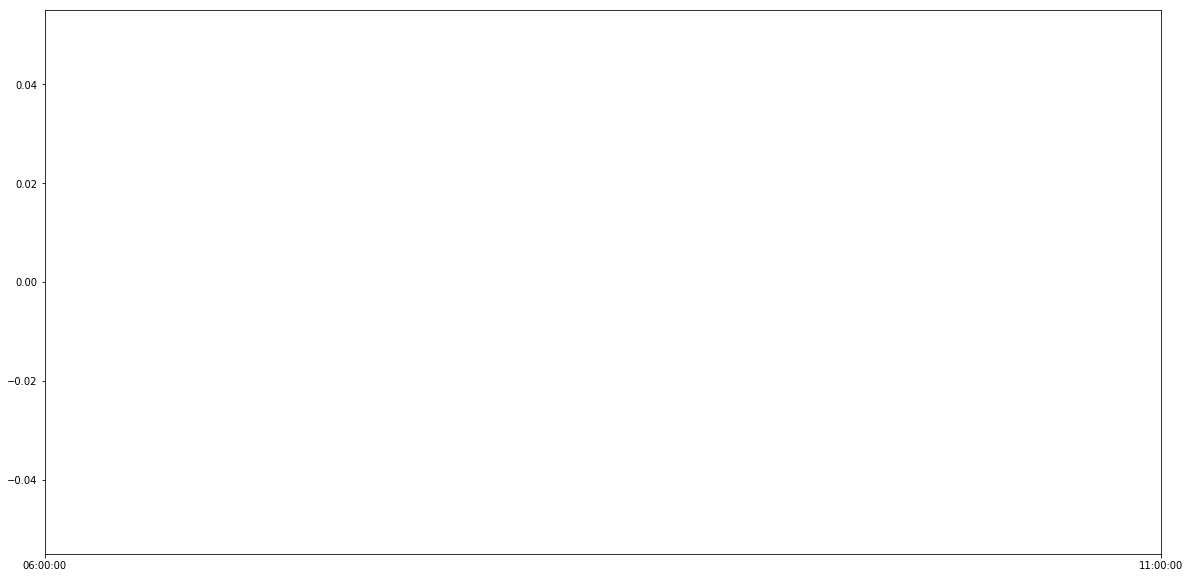

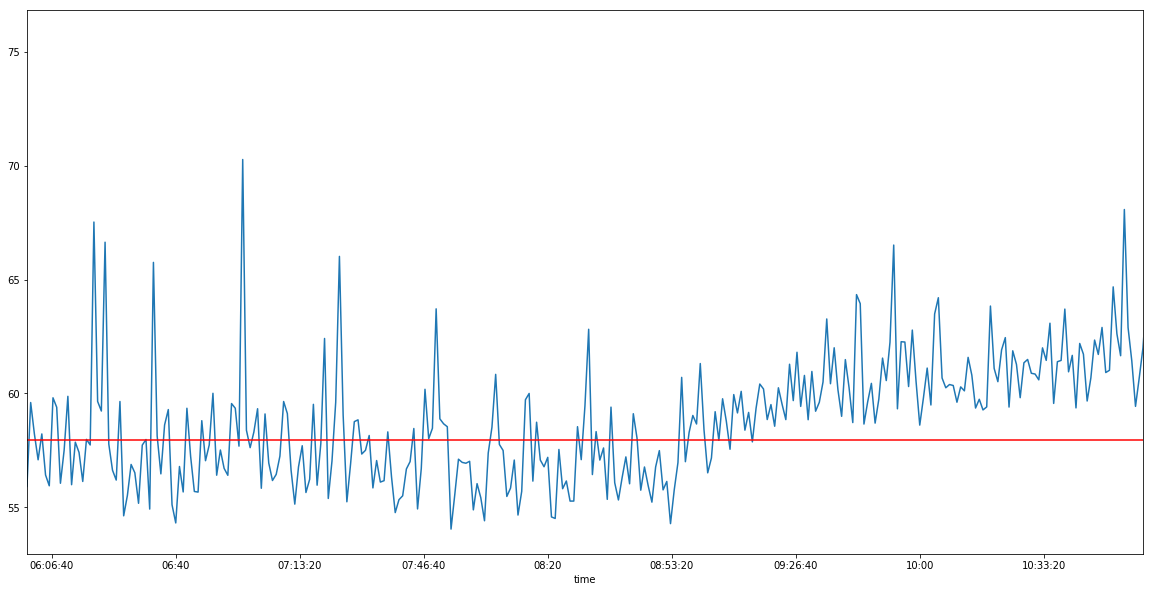

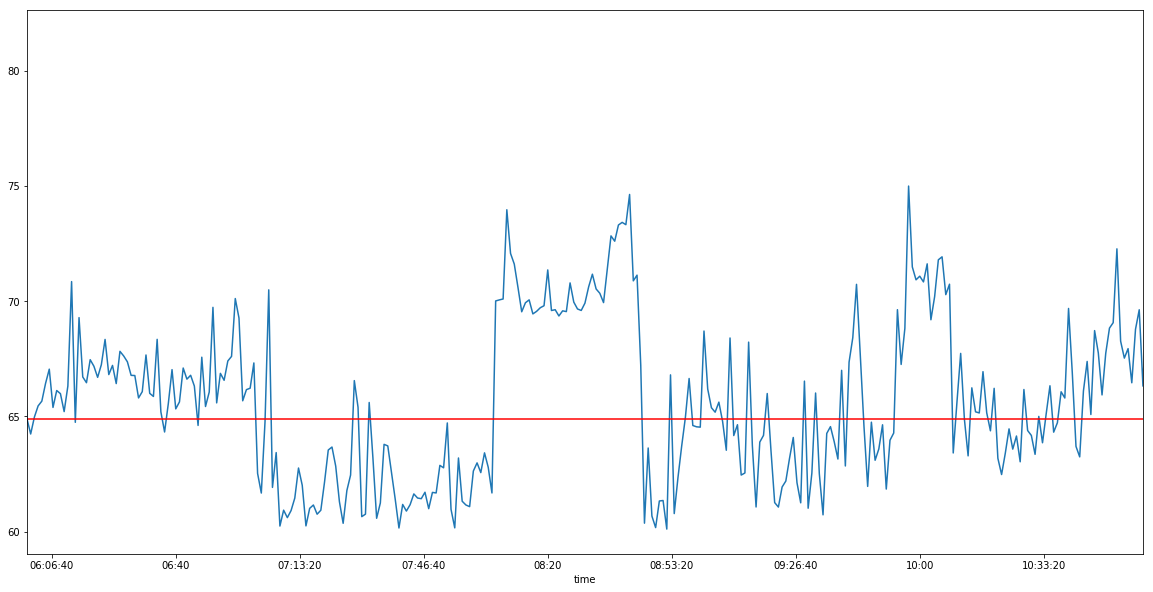

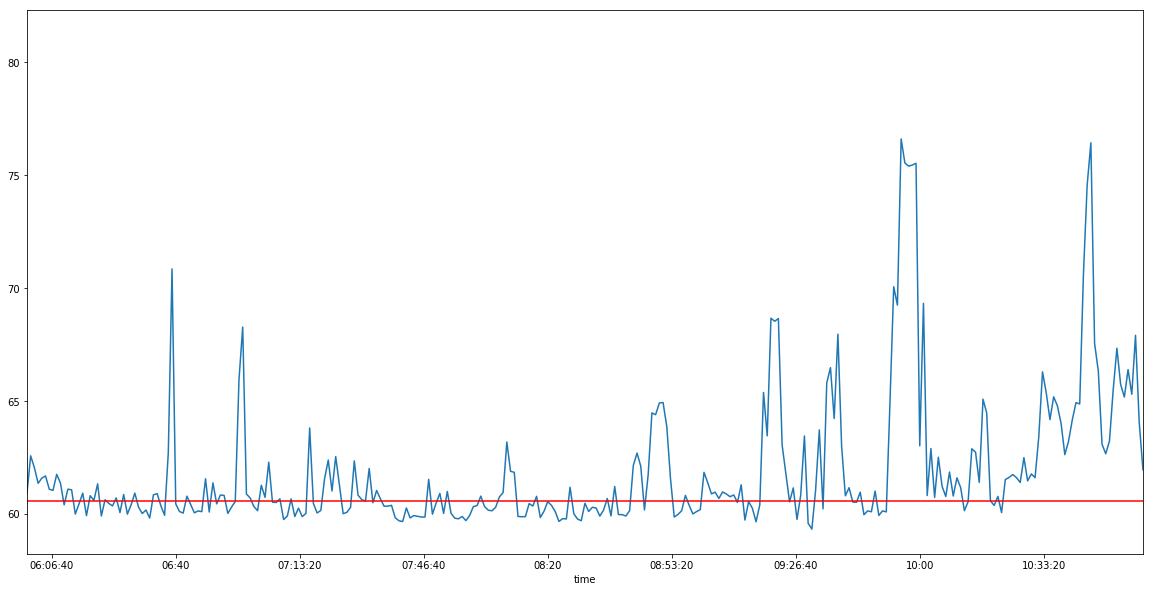

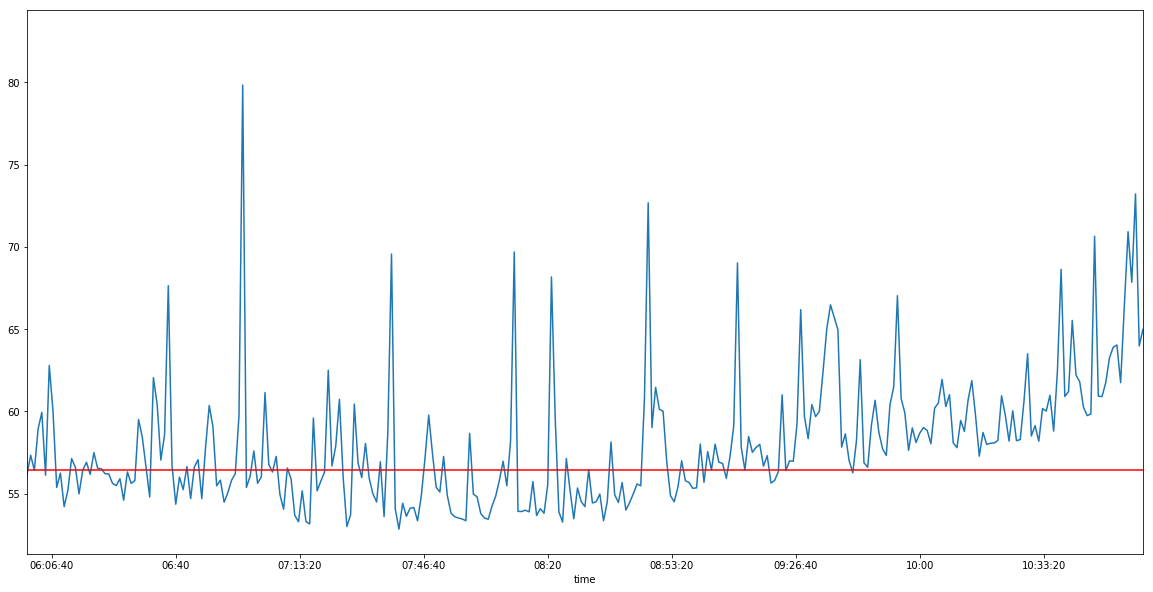

In [82]:
for i in range(9):
    for frame in [year_2017_4_12_m[i]]:
        plt.figure(figsize=(20,10))
        plt.plot(frame['time'], frame['dBAS'])
        plt.axhline(y=L90_m[i], color='r', linestyle='-')
        plt.xlim(['06:00:00','11:00:00'])
        plt.show() #do plt.show inside loop to get a new graph per iteration        